<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Homework: Feature Selection and Dimention Reduction. PCA </center></h2>

In [163]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gender Recognition by Voice

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [164]:
# Read data sample
data = pd.read_csv("data/voice.csv")
print("DataFrame shape: ", data.shape)
print(data.head())

DataFrame shape:  (3168, 21)
   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0

## Data Preparation


In [165]:
# Get feature names
feature_names = data.columns.drop(['label'])
print("Feature names: ", feature_names)

Feature names:  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [166]:
# Prepare X and y
X = data[feature_names].values
y = 1. * (data['label'].values == 'male')

## Train / Test Split + Standardization

We perform standartization to provide you possibility to use any classifier you know without any difficulties induced by feature scales. 

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardization
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Classifier Selection

Generally, tasks below can be done with any classifier, but we ask you to provide answers with Decision Tree classifier with the following hyperparameters (don't touch this):

In [168]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Task 1 (1 point)

Find just **one** feature, that provides the best classification accuracy. What is the name of this feature? Save name in variable first_best_feature and go through assert

Hint: in **for** loop use one feature in the sample to train the classifier. Then, calculate the classification accuracy on the test sample.

In [169]:
feature_names[12]

'meanfun'

In [170]:
from sklearn.metrics import roc_auc_score

max_score, first_best_indx, size = 0.0, 0, X_test.shape[1]

for indx in range(0, size):
    clf.fit(X_train[:, indx].reshape(-1,1), y_train)
    y_pred = clf.predict(X_test[:, indx].reshape(-1,1))
    
    cur_score = roc_auc_score(y_test, y_pred)
    
    if max_score < cur_score:
        first_best_indx = indx
        max_score = cur_score
        
first_best_feature = feature_names[first_best_indx]

In [171]:
assert(first_best_feature == 'meanfun')

# Task 2 (2 points)

Now you know the first best feature of the sample. In this task you need to find the second best feature. What are the names of these features?

Save answer in variables first_best_feature and second_best_feature and go through assert

Hint: in **for** loop use **two** features to train the classifier. One of the two features is the found best feature from Task 1, the second feature is a new one. 

In [172]:
max_score, second_best_indx, size = 0.0, 0, X_train.shape[1]

for indx in range(0, size):
    
    if indx == first_best_indx:
        continue
        
    clf.fit(np.transpose(np.vstack((X_train[:, first_best_indx], X_train[:, indx]))), y_train)
    y_pred = clf.predict(np.transpose(np.vstack((X_test[:, first_best_indx], X_test[:, indx]))))
    
    score = roc_auc_score(y_test, y_pred)
    
    if max_score < score:
        second_best_indx = indx
        max_score = score
    
second_best_feature = feature_names[second_best_indx]

In [173]:
assert(first_best_feature == 'meanfun' and second_best_feature == 'Q75')

# Task 3 (4 points)

Great! As you can guess, now your task is to find the best 3 features, the best 4 features, ...., the best 20 features :) Use the silimilar approach as in Task 2.

For the each N best features calculate the classification accuracy. Plot dependency of the accuracy from N. Print list of the following pairs of values: (Name of the N-th best feature, accuracy).

The output example:

In [174]:
def find_accuracies_and_features():
    
    best_accuracies, best_feature_indx = [], []
    max_score, size = 0.0, X_test.shape[1]

    for i in range(size):
        max_score, max_index = 0, 0
        clf.max_features = len(best_feature_indx) + 1
        
        for j in range(size):  
            newElArr = best_feature_indx.copy()
            newElArr.append(j)
            
            clf.fit(X_train[:, newElArr], y_train)
            y_pred = clf.predict(X_test[:, newElArr])
            
            if max_score < roc_auc_score(y_test, y_pred):
                max_score = roc_auc_score(y_test, y_pred)
                max_index = j
                
        best_feature_indx.append(max_index)
        best_accuracies.append(max_score)
    
    return best_accuracies, feature_names[best_feature_indx]

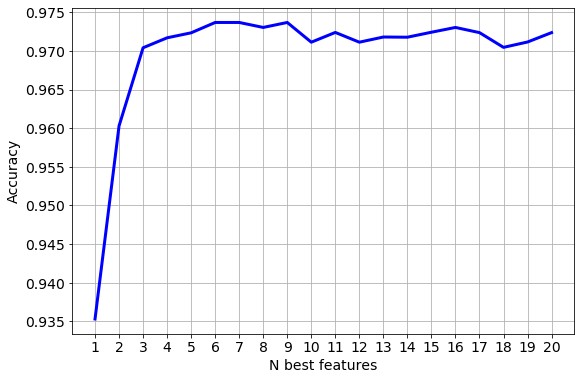

In [175]:
n_best_features = np.arange(1, 21)
n_best_names = feature_names # You need to find the correct order
n_best_accuracies = np.random.rand(20) # You need to calculate these accuracies

n_best_accuracies, n_best_names = find_accuracies_and_features()

plt.figure(figsize=(9, 6))
plt.plot(n_best_features, n_best_accuracies, color='b', linewidth=3)
plt.xticks(n_best_features, size=14)
plt.xlabel("N best features", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid(b=1)
plt.show()

In [176]:
report = pd.DataFrame()
report['Name'] = n_best_names
report['Accuracy'] = n_best_accuracies
report

,Name,Accuracy
0,meanfun,0.935318
1,Q75,0.960300
2,IQR,0.970405
3,sp.ent,0.971694
4,meanfun,0.972338
5,minfun,0.973678
6,Q75,0.973678
7,Q75,0.973034
8,kurt,0.973678
9,IQR,0.971126


In [177]:
assert list(report['Name'] == ['meanfun', 'Q75', 'IQR', 'sp.ent', 'minfun', 'mode', 'kurt', 'skew', 'maxfun', 'mindom', 'Q25', 'meanfreq', 'sd', 'sfm', 'median', 'centroid', 'maxdom', 'meandom', 'dfrange', 'modindx'])

# Task 4 (2 points)

Well, now let's use PCA. Plot the dependency of the classification accuracy from the number of components of PCA. Vary the number of components from 1 to 20. Do you have the same accuracies for one PCA component and for the first best feature from Task 1? How do you explain it?

In this task you can use PCA from seminar or PCA from sklearn

The output example:

In [178]:
class MyPCA(object):
    
    def __init__(self, n_components=1):
        """
        This class performs PCA.
        
        Parameters
        ----------
        n_components : int
            Number of the first principle components to use.
        """
        
        self.n_components = n_components
        self.means = None
        self.stds = None
        self.A = None
        self.eig_vals = None
        self.eig_vecs = None
        
        
    def _normalize(self, X, is_fit=True):
        """
        This method centers and scales input data.
        
        Parameters
        ----------
        X : numpy.ndarray
            Input data sample with shape=[n_objects, n_features]
            
        Returns
        -------
        X_center : numpy.ndarray
            Centered and scaled input data sample with shape=[n_objects, n_features]
        """
        if is_fit:
            self.means = X.mean(axis=0)
            self.stds = X.std(axis=0)
            
        X_center = ( X - self.means ) / self.stds
        
        return X_center
        
    
    def fit(self, X):
        """
        This method searches for the first eigenvectors for PCA.
        
        Parameters
        ----------
        X : numpy.ndarray
            Input data smaple with shape=[n_objects, n_features]
        """
        
        # Centering (and scaling)
        X_center = self._normalize(X)
        
        # Calculate covariance matrix
        C = np.dot(X_center.T, X_center)
        
        # Find eigenvalues and eigenvectors
        self.eig_vals, self.eig_vecs = np.linalg.eig(C)
        self.eig_vecs = self.eig_vecs.T
        
        # Sort eigenvalues
        sorted_indeces = self.eig_vals.argsort()[::-1]
        
        # Take the first n_components
        if self.n_components > len(self.eig_vecs):
            print("Are you crazy?! You want more components that I have. I'll give only ", str(len(self.eig_vecs)))
        n_first_indeces = sorted_indeces[:self.n_components]
        self.A = self.eig_vecs[n_first_indeces].T
        
        
    def transform(self, X):
        """
        Performs projections on the selected components.
        
        Parameters
        ----------
        X : numpy.ndarray
            Input data smaple with shape=[n_objects, n_features]
            
        Returns
        -------
        X_pca : numpy.ndarray
            Transformed input data smaple with shape=[n_objects, n_components]
        """
        
        if self.A is None:
            print("Hey! What are you doing? Fit me firstly.")
            return X
        
        # Centering (and scaling)
        X_center = self._normalize(X, is_fit=False)
            
        # Perform projection
        X_pca = np.dot(X_center, self.A)
        
        return X_pca

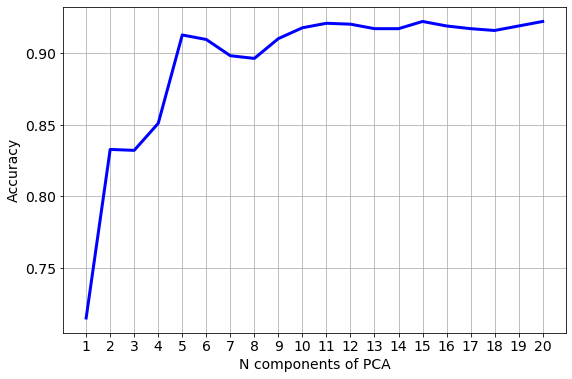

In [179]:
from sklearn.metrics import accuracy_score

pca_components = np.arange(1, 21)
pca_accuracies, pca_aucs = [], []

for n_components in pca_components:
    pca = MyPCA(n_components=n_components)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    clf.max_features = n_components
    clf.fit(X_train_pca, y_train)
    
    y_test_predict = clf.predict(X_test_pca)
    y_test_proba = clf.predict_proba(X_test_pca)[:, 1]
    
    accuracy = accuracy_score(y_test, y_test_predict)
    pca_accuracies.append(accuracy)
    
    auc = roc_auc_score(y_test, y_test_proba)
    pca_aucs.append(auc)


plt.figure(figsize=(9, 6))
plt.plot(pca_components, pca_accuracies, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("N components of PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Accuracy", size=14)
plt.grid(b=1)
plt.show()

# Task 5 (1 point)

Plot explained variance and cumulative explained variance for the PCA at every number of components.

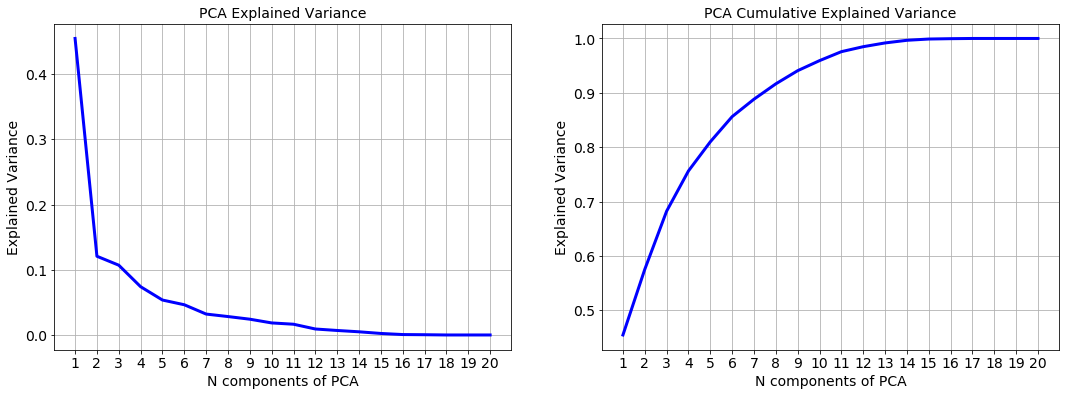

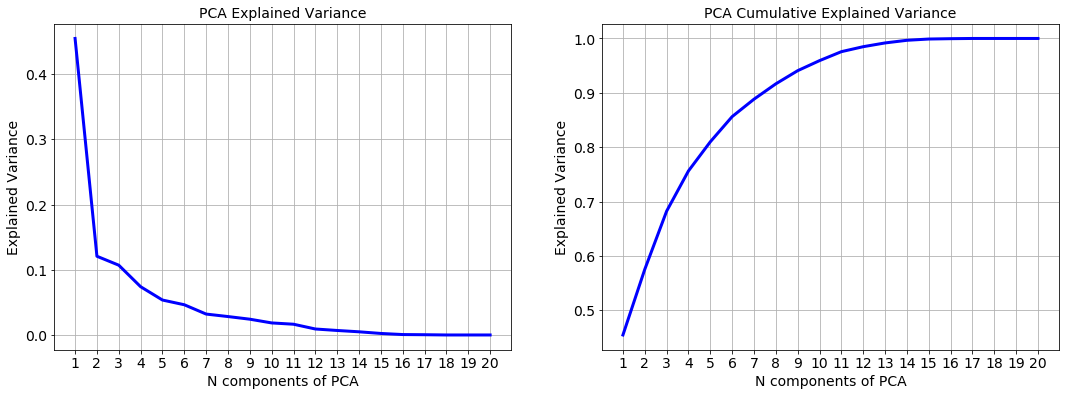

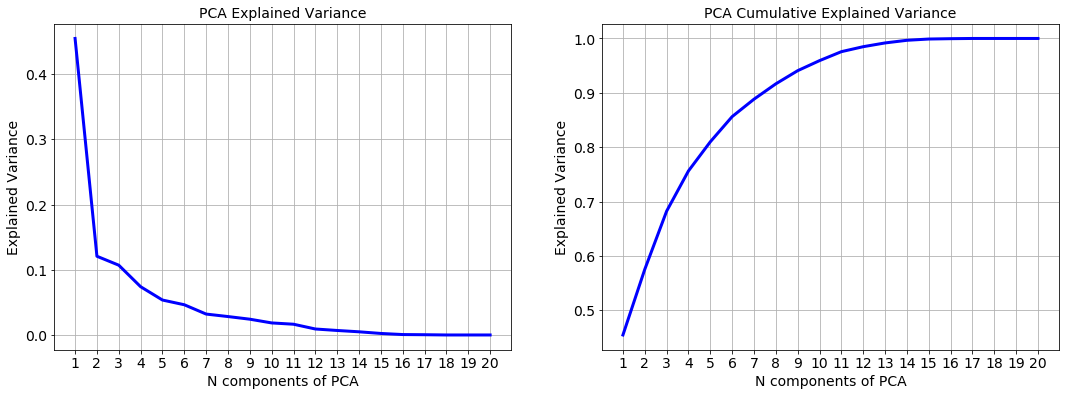

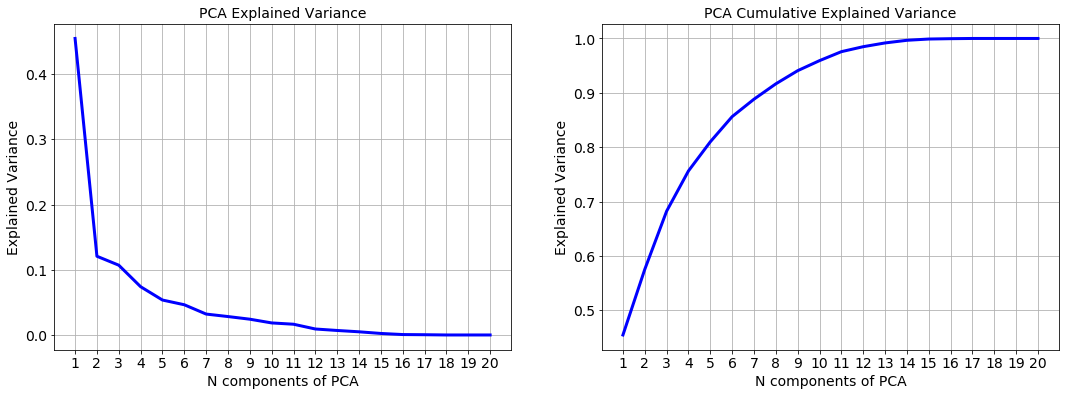

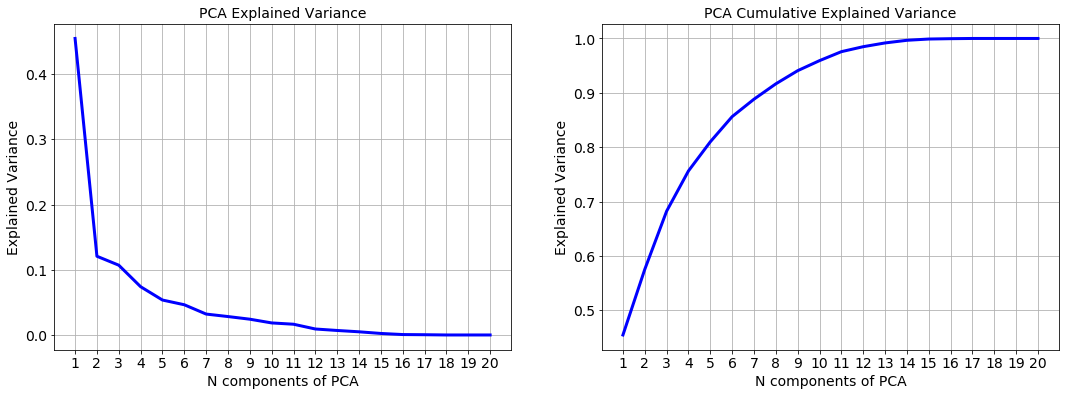

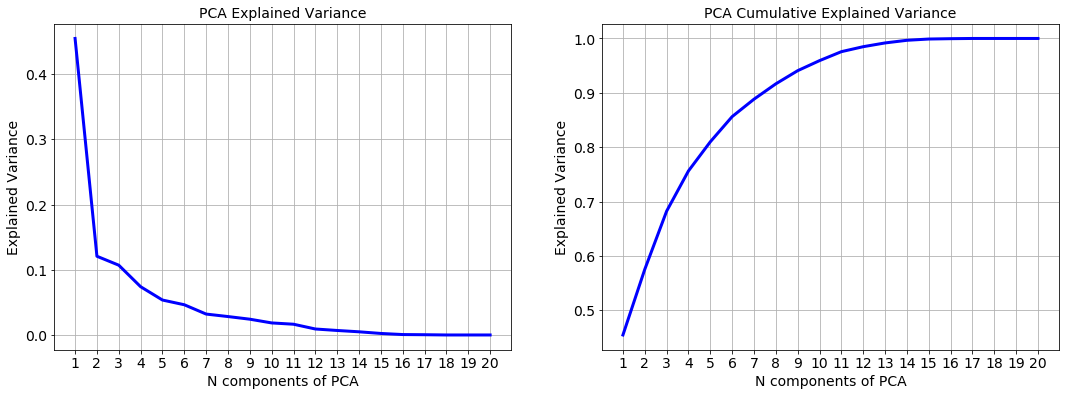

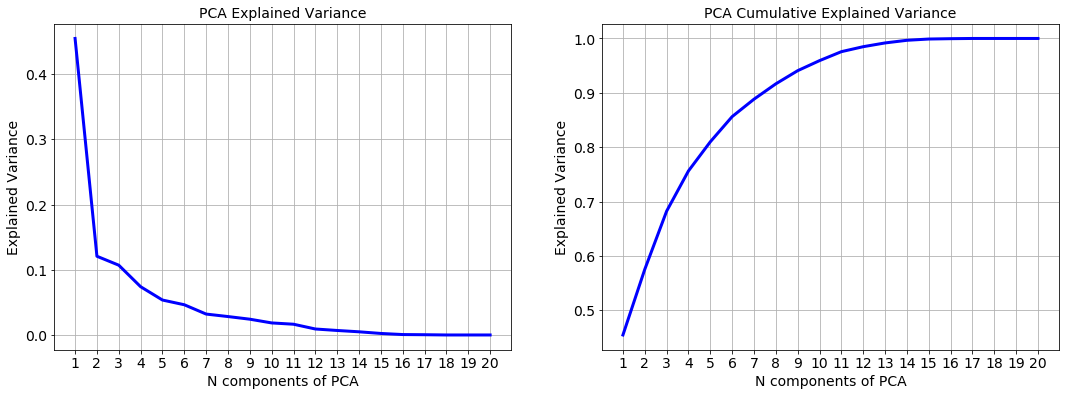

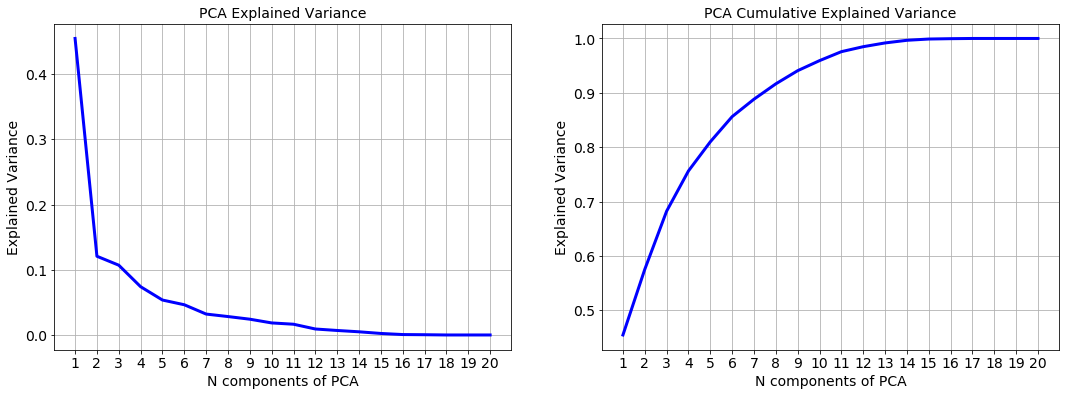

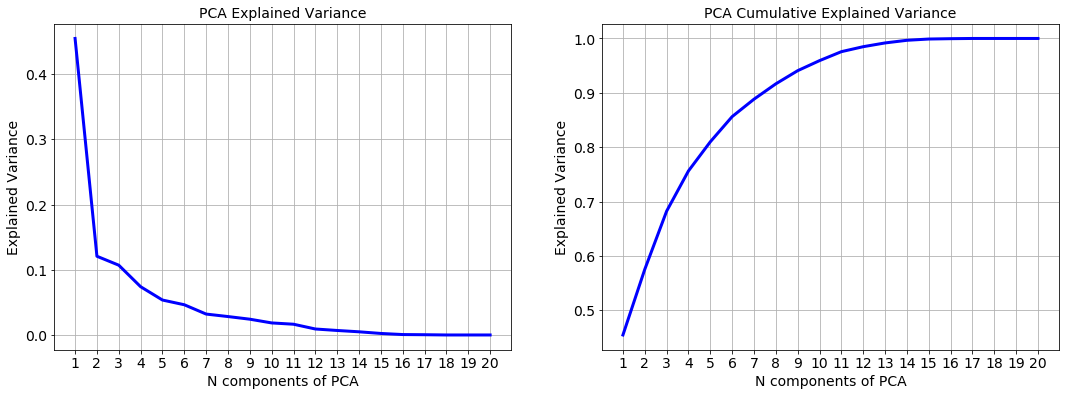

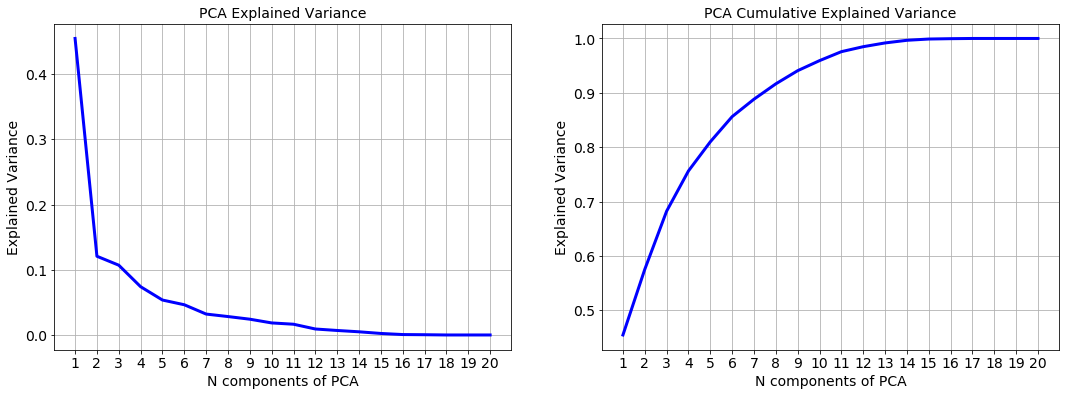

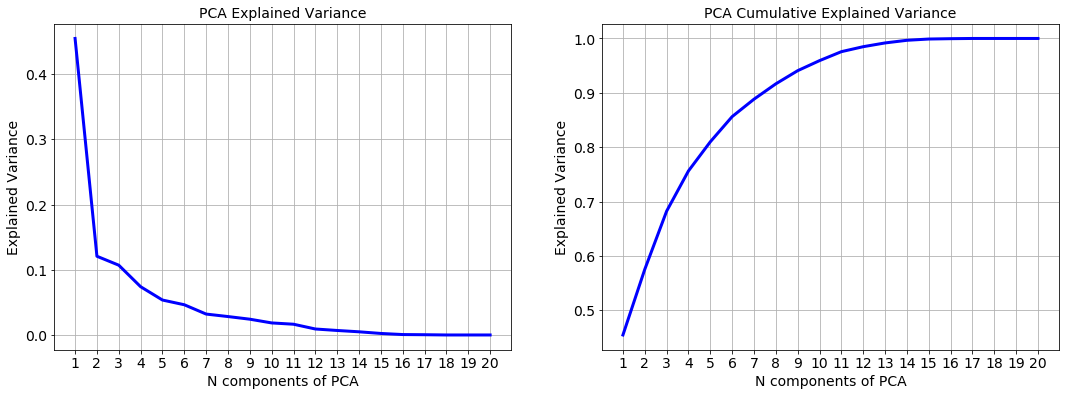

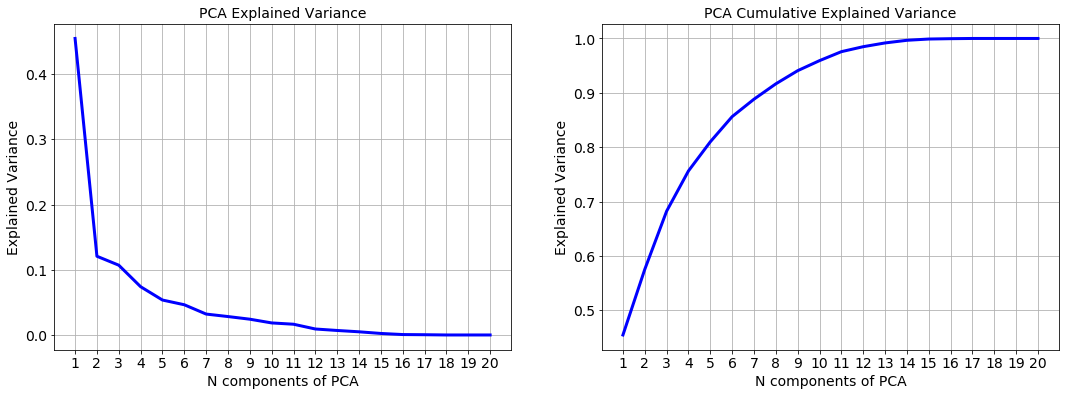

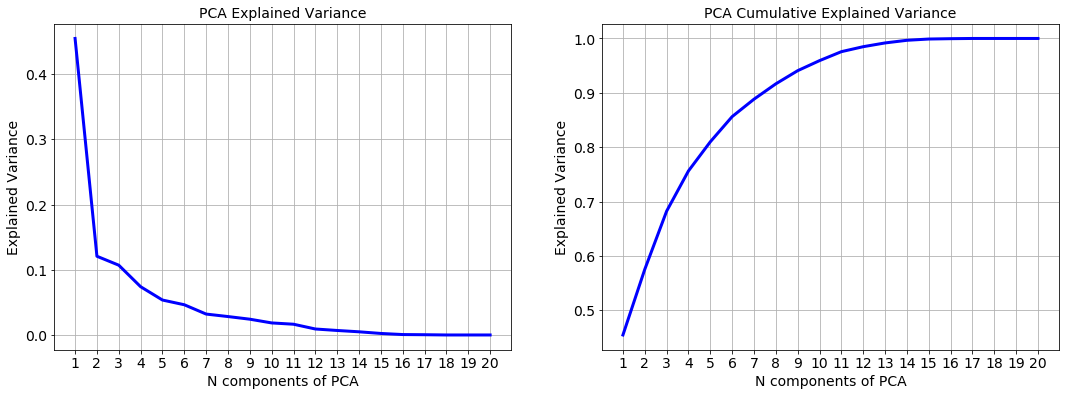

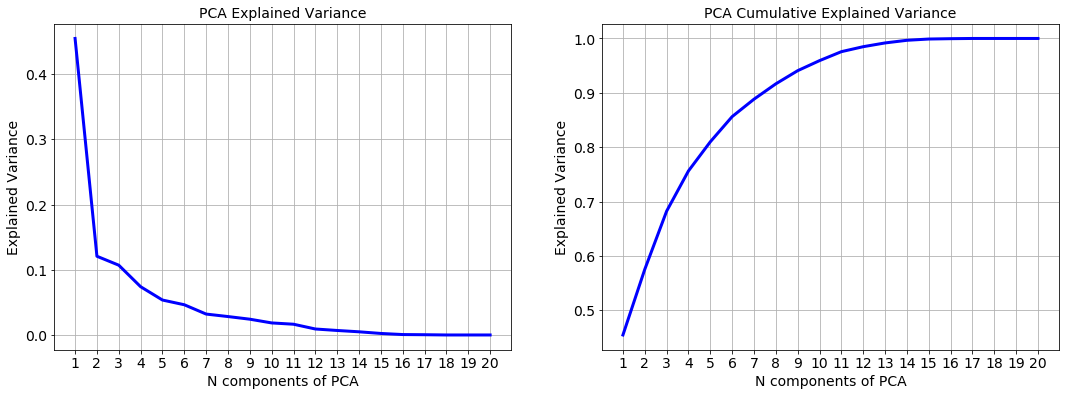

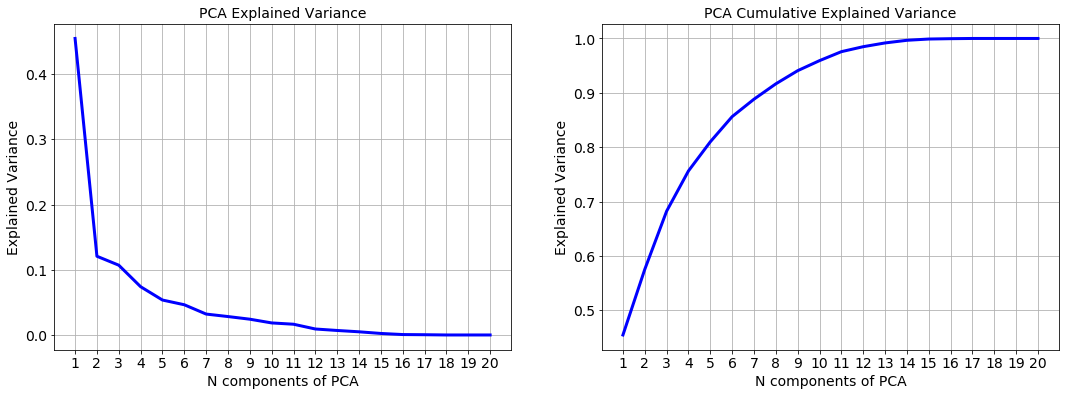

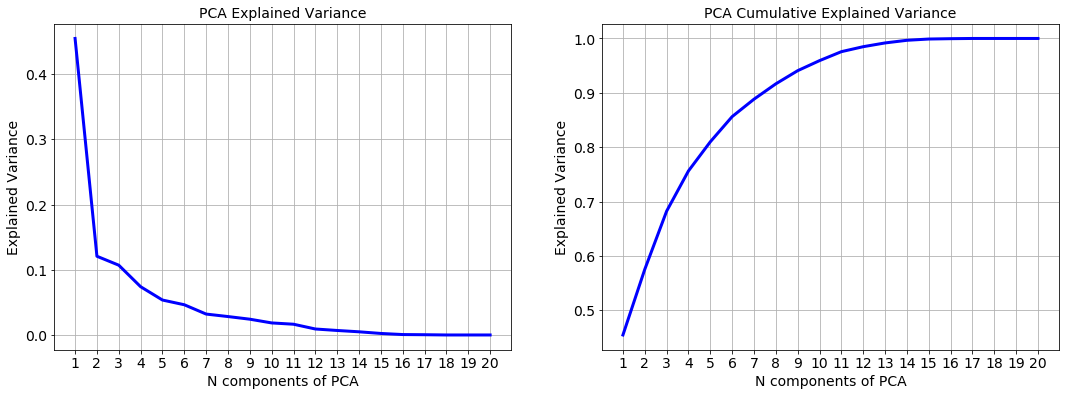

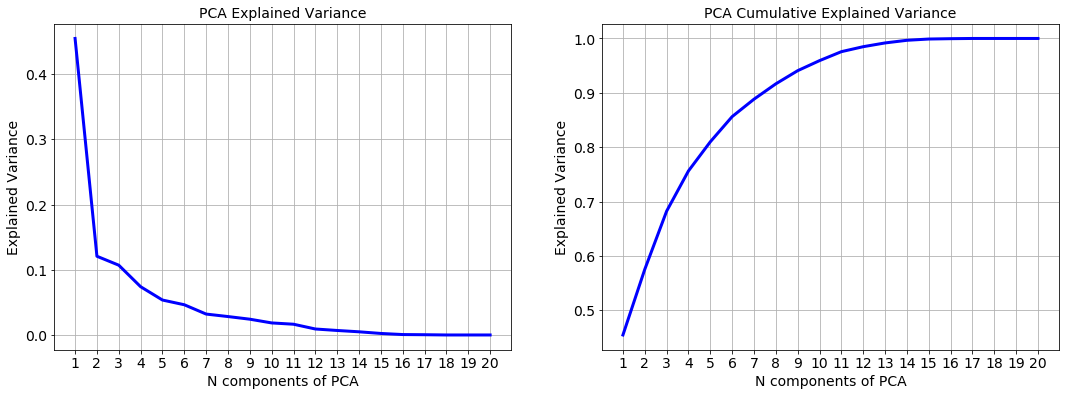

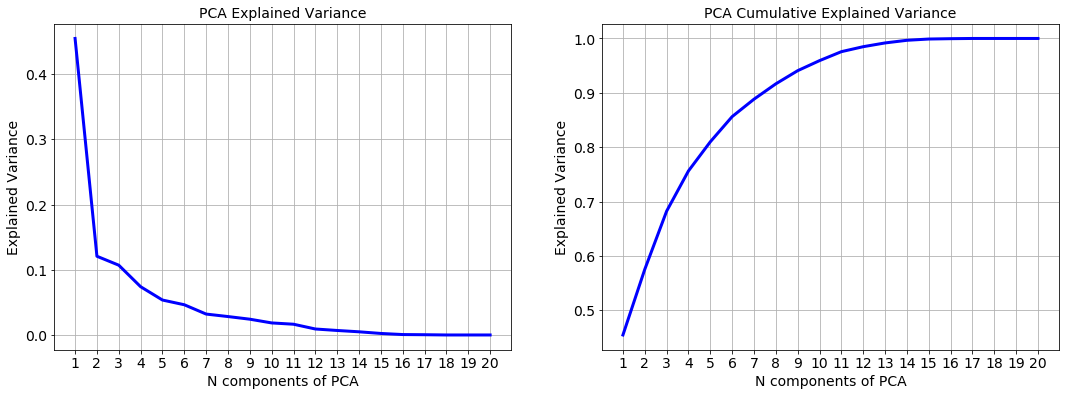

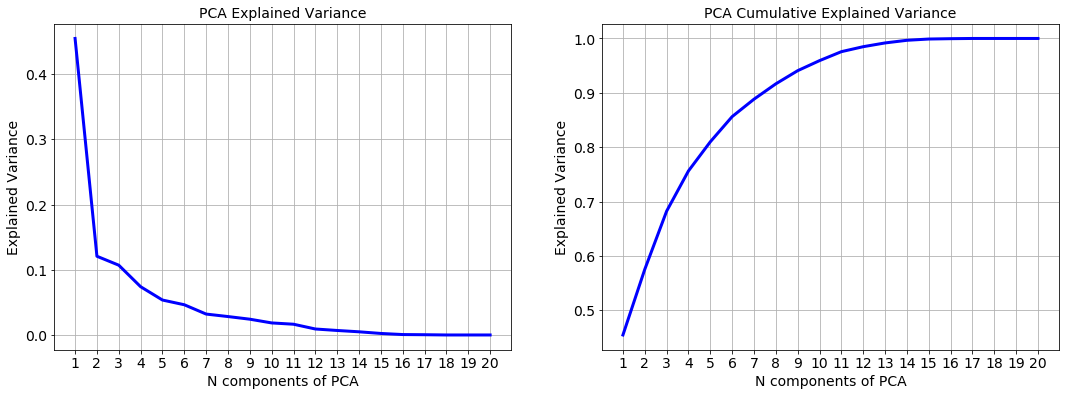

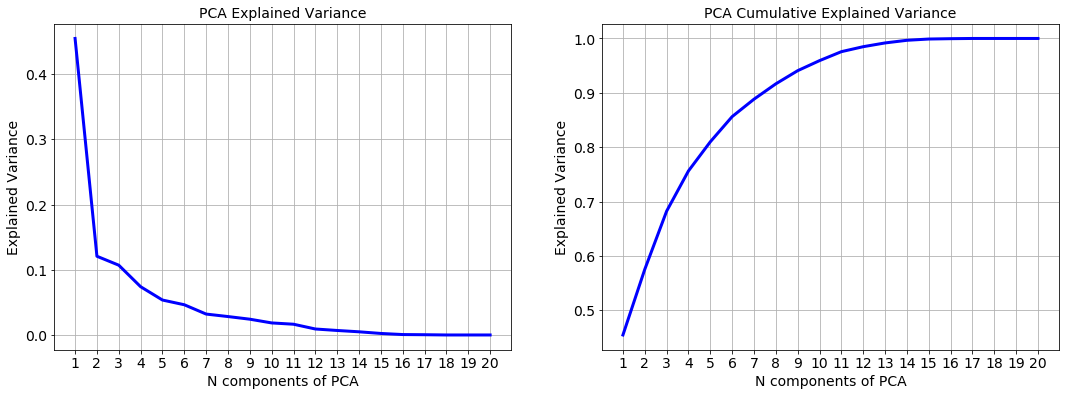

In [181]:
for n_components in pca_components:
    pca = MyPCA(n_components = n_components)
    pca.fit(X_train)

    # Take all eigenvalues
    eigenvalues = pca.eig_vals

    # Sort eigenvalues
    eigenvalues = np.sort(eigenvalues)[::-1]

    # Calculate explained variance
    explained_variance = eigenvalues / eigenvalues.sum()

    # Calculate cumulative explained variance
    cumsum_explained_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(18, 6))

    plt.subplot(1, 2, 1)
    plt.plot(pca_components, explained_variance, color='b', linewidth=3)
    plt.xticks(pca_components, size=14)
    plt.xlabel("N components of PCA", size=14)
    plt.yticks(size=14)
    plt.ylabel("Explained Variance", size=14)
    plt.title("PCA Explained Variance", size=14)
    plt.grid(b=1)


    plt.subplot(1, 2, 2)
    plt.plot(pca_components, cumsum_explained_variance, color='b', linewidth=3)
    plt.xticks(pca_components, size=14)
    plt.xlabel("N components of PCA", size=14)
    plt.yticks(size=14)
    plt.ylabel("Explained Variance", size=14)
    plt.title("PCA Cumulative Explained Variance", size=14)
    plt.grid(b=1)


    plt.show()